<h1 style="background-color:#0071BD;color:white;text-align:center;padding-top:0.8em;padding-bottom: 0.8em">
Kernel Least Squares Optimization (1)
</h1>

Accompanying notebook for the recipe:

  * Christian Bauckhage: "NumPy / SciPy Recipes for Data Science: Kernel Least Squares Optimization (1)", <br/>Technical Report, March 2015 ([Download from ResearchGate](https://www.researchgate.net/publication/274374009_NumPy_SciPy_Recipes_for_Data_Science_Kernel_Least_Squares_Optimization_1))

  * Abstract of the paper: _In this note, we show that least squares optimization is amenable to the kernel trick. This provides great flexibility in model fitting and we consider examples that illustrate this. In particular, we will discuss how kernel functions can implicitly introduce non-linearity into the least squares method._
  
<p style="background-color:#66A5D1;padding-top:0.2em;padding-bottom: 0.2em" />

In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd

import scipy.spatial as spt
import scipy.sparse.linalg as sla

import matplotlib.pyplot as plt

## 2D Data Points

In [2]:
def create_data_2D(n, w, xmin=-4, xmax=8):
    x = rnd.random(n) * (xmax - xmin) + xmin
    X = np.vander(x, len(w))
    y = np.dot(X, w) + rnd.randn(n) * 0.5
    return x, y

In [3]:
n = 50
wTrain = np.array([0.1, -0.8, 0.0, 11.5])
xTrain, yTrain = create_data_2D(n, wTrain)

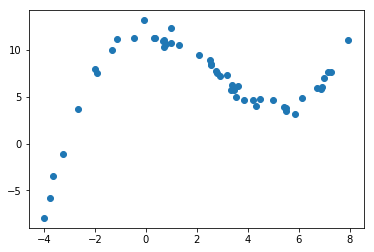

In [4]:
plt.scatter(xTrain, yTrain)
plt.show()

## Regularized Linear Regression

In [5]:
XTrain = np.vander(xTrain, 2)
w = sla.lsmr(XTrain, yTrain, damp=1.)[0] 

In [6]:
N = 2 * n
xTest = np.linspace(-4, 8, N)
XTest = np.vander(xTest, 2)
yTest = XTest.dot(w)

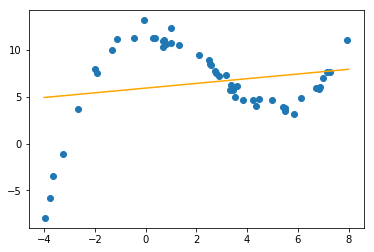

In [7]:
plt.scatter(xTrain, yTrain)
plt.plot(xTest, yTest, '-', color='orange')
plt.show()

## Polynomial Kernel Regression

In [8]:
def polyKernelMat(X, p):
    return (X.dot(X.T) + 1.)**p

def polyKernelVec(x, X, p):
    return (x.dot(X.T) + 1.)**p

In [9]:
p = 3
K = polyKernelMat(XTrain, p)
KI = la.inv(K + 1. * np.identity(n))
KIy = KI.dot(yTrain)

In [10]:
xTest = np.linspace(-4, 8, N)
XTest = np.vander(xTest, 2)
yTest = np.zeros(N)
for i in range(N):
    k = polyKernelVec(XTest[i,:], XTrain, p)
    yTest[i] = k.dot(KIy)

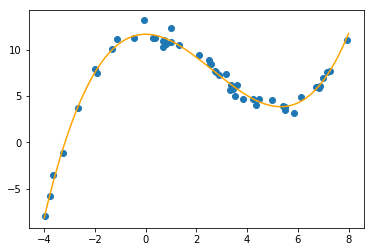

In [11]:
plt.scatter(xTrain, yTrain)
plt.plot(xTest, yTest, '-', color='orange')
plt.show()

## Gaussian Kernel Regression

In [12]:
def squaredEDM(X):
    V = spt.distance.pdist(X, 'sqeuclidean')
    D = spt.distance.squareform(V)
    return D

def gaussKernelMat(X, s):
    D = squaredEDM(X)
    K = np.exp(-0.5/s**2 * D)
    return K

def gaussKernelVec(x, X, s):
    d = np.sum((X-x)**2, axis=1)
    k = np.exp(-0.5/s**2 * d)
    return k

In [13]:
s = 2.5
K = gaussKernelMat(XTrain, s)
KI = la.inv(K + 1. * np.identity(n))
KIy = KI.dot(yTrain)

In [14]:
xTest = np.linspace(-4, 8, N)
XTest = np.vander(xTest, 2)
yTest = np.zeros(N)
for i in range(N):
    k = gaussKernelVec(XTest[i,:], XTrain, s)
    yTest[i] = k.dot(KIy)

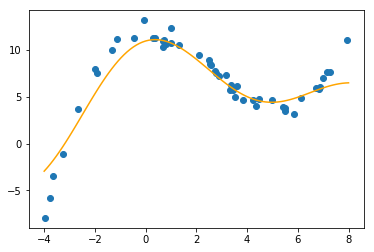

In [15]:
plt.scatter(xTrain, yTrain)
plt.plot(xTest, yTest, '-', color='orange')
plt.show()

<table style="width:100%">
  <tr>
      <td colspan="1" style="text-align:left;background-color:#0071BD;color:white">
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">
            <img alt="Creative Commons License" style="border-width:0;float:left;padding-right:10pt"
                 src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" />
        </a>
        &copy; C. Bauckhage and O. Cremers<br/>
        Licensed under a 
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/" style="color:white">
            CC BY-NC 4.0
        </a>.
      </td>
      <td colspan="2" style="text-align:left;background-color:#66A5D1">
          <b>Acknowledgments:</b>
          This material was prepared within the project
          <a href="http://www.b-it-center.de/b-it-programmes/teaching-material/p3ml/" style="color:black">
              P3ML
          </a> 
          which is funded by the Ministry of Education and Research of Germany (BMBF)
          under grant number 01/S17064. The authors gratefully acknowledge this support.
      </td>
  </tr>
</table>